In [76]:
import pandas as pd
import seaborn as sbn
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import confusion_matrix, accuracy_score

In [40]:
data = pd.read_csv("Cancer_Data.csv")
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [41]:
data.tail()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN
568,92751,B,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,NaN


In [42]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [43]:
data.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [44]:
data = data.drop(["Unnamed: 32"], axis = 1)
data.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

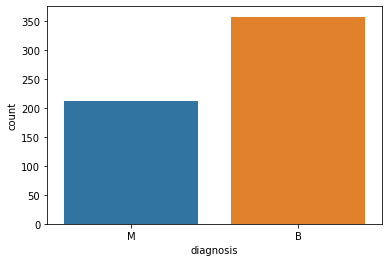

In [45]:
sbn.countplot(x = "diagnosis", data = data)
plt.show()

In [46]:
## label and one hot encoder
label = LabelEncoder()
diagnosis = data.iloc[:, 1] 
diagnosis = label.fit_transform(diagnosis)  ## m = 1, b = 0
diagnosis.shape

(569,)

In [50]:
type(diagnosis)

numpy.ndarray

In [47]:
## burayı sonra çalıştır.
#one = OneHotEncoder()
#diagnosis = diagnosis.reshape(-1, 1)
#diagnosis = one.fit_transform(diagnosis).toarray()
#diagnosis_df = pd.DataFrame(data = diagnosis, index = range(569), columns = ["b", "m"])

In [48]:
data = data.drop(["diagnosis"], axis = 1)

In [52]:
diagnosis_df = pd.DataFrame(diagnosis, columns = ["diagnosis"])  ## array to dataframe

In [53]:
data = pd.concat([diagnosis_df, data], axis = 1)

In [54]:
## correlation
data.corr()["diagnosis"].sort_values

<bound method Series.sort_values of diagnosis                  1.000000
id                         0.039769
radius_mean                0.730029
texture_mean               0.415185
perimeter_mean             0.742636
area_mean                  0.708984
smoothness_mean            0.358560
compactness_mean           0.596534
concavity_mean             0.696360
concave points_mean        0.776614
symmetry_mean              0.330499
fractal_dimension_mean    -0.012838
radius_se                  0.567134
texture_se                -0.008303
perimeter_se               0.556141
area_se                    0.548236
smoothness_se             -0.067016
compactness_se             0.292999
concavity_se               0.253730
concave points_se          0.408042
symmetry_se               -0.006522
fractal_dimension_se       0.077972
radius_worst               0.776454
texture_worst              0.456903
perimeter_worst            0.782914
area_worst                 0.733825
smoothness_worst           0

In [55]:
data.head()

,diagnosis,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [57]:
data = data.drop(["id"], axis = 1)

<AxesSubplot:>

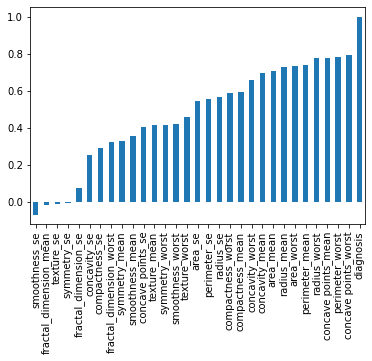

In [58]:
data.corr()["diagnosis"].sort_values().plot(kind = "bar")

In [59]:
## independent and dependent variables
y = data["diagnosis"].values
y.shape

(569,)

In [60]:
type(y)

numpy.ndarray

In [63]:
x = data.drop(["diagnosis"], axis = 1).values
x.shape

(569, 30)

In [64]:
type(x)

numpy.ndarray

In [71]:
## test and train
x_train, x_test, y_train, y_true = train_test_split(x, y, test_size = 0.3, random_state = 123)

In [72]:
x_train.shape

(398, 30)

In [73]:
x_test.shape

(171, 30)

In [74]:
## scaling
scale = MinMaxScaler()
x_train = scale.fit_transform(x_train)
x_test = scale.fit_transform(x_test)

In [78]:
## model
model = Sequential()

model.add(Dense(units = 30, activation = "relu"))
model.add(Dense(units = 15, activation = "relu"))
model.add(Dense(units = 15, activation = "relu"))
model.add(Dense(units = 10, activation = "relu"))

model.add(Dense(units = 1, activation = "sigmoid"))

model.compile(loss = "binary_crossentropy", optimizer = "adam")

In [79]:
model.fit(x = x_train, y = y_train, epochs = 500, validation_data = (x_test, y_true), verbose = 1)

Epoch 1/500
13/13 [==============================] - 2s 15ms/step - loss: 0.6878 - val_loss: 0.6791
Epoch 2/500
13/13 [==============================] - 0s 3ms/step - loss: 0.6666 - val_loss: 0.6566
Epoch 3/500
13/13 [==============================] - 0s 3ms/step - loss: 0.6408 - val_loss: 0.6260
Epoch 4/500
13/13 [==============================] - 0s 3ms/step - loss: 0.6092 - val_loss: 0.5931
Epoch 5/500
13/13 [==============================] - 0s 3ms/step - loss: 0.5707 - val_loss: 0.5459
Epoch 6/500
13/13 [==============================] - 0s 3ms/step - loss: 0.5210 - val_loss: 0.4841
Epoch 7/500
13/13 [==============================] - 0s 3ms/step - loss: 0.4551 - val_loss: 0.4179
Epoch 8/500
13/13 [==============================] - 0s 3ms/step - loss: 0.3868 - val_loss: 0.3494
Epoch 9/500
13/13 [==============================] - 0s 3ms/step - loss: 0.3203 - val_loss: 0.3059
Epoch 10/500
13/13 [==============================] - 0s 3ms/step - loss: 0.2666 - val_loss: 0.2412
Epoch 11

13/13 [==============================] - 0s 3ms/step - loss: 0.0386 - val_loss: 0.4938
Epoch 84/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0395 - val_loss: 0.4780
Epoch 85/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0385 - val_loss: 0.3819
Epoch 86/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0386 - val_loss: 0.5570
Epoch 87/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0502 - val_loss: 0.3715
Epoch 88/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0458 - val_loss: 0.4753
Epoch 89/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0367 - val_loss: 0.4789
Epoch 90/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0376 - val_loss: 0.5176
Epoch 91/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0379 - val_loss: 0.5175
Epoch 92/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0383 - val_loss: 0.5066
Epoch 93/500


13/13 [==============================] - 0s 3ms/step - loss: 0.0259 - val_loss: 0.6479
Epoch 165/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0236 - val_loss: 0.6234
Epoch 166/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0224 - val_loss: 0.7265
Epoch 167/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0344 - val_loss: 0.5889
Epoch 168/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0228 - val_loss: 0.7275
Epoch 169/500
13/13 [==============================] - 0s 4ms/step - loss: 0.0246 - val_loss: 0.7207
Epoch 170/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0265 - val_loss: 0.6736
Epoch 171/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0228 - val_loss: 0.6721
Epoch 172/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0229 - val_loss: 0.6665
Epoch 173/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0227 - val_loss: 0.6234
Epoc

13/13 [==============================] - 0s 2ms/step - loss: 0.0149 - val_loss: 0.7700
Epoch 246/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0179 - val_loss: 0.8825
Epoch 247/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0196 - val_loss: 0.8082
Epoch 248/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0129 - val_loss: 0.8027
Epoch 249/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0139 - val_loss: 0.8513
Epoch 250/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0153 - val_loss: 0.7326
Epoch 251/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0167 - val_loss: 0.8047
Epoch 252/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0162 - val_loss: 0.8602
Epoch 253/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0134 - val_loss: 0.7481
Epoch 254/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0134 - val_loss: 0.8251
Epoc

13/13 [==============================] - 0s 3ms/step - loss: 0.0223 - val_loss: 1.0545
Epoch 327/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0288 - val_loss: 0.6450
Epoch 328/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0095 - val_loss: 1.0721
Epoch 329/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0184 - val_loss: 0.7291
Epoch 330/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0132 - val_loss: 0.9389
Epoch 331/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0096 - val_loss: 0.8255
Epoch 332/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0078 - val_loss: 0.8627
Epoch 333/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0113 - val_loss: 0.7078
Epoch 334/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0119 - val_loss: 0.9604
Epoch 335/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0137 - val_loss: 0.8067
Epoc

13/13 [==============================] - 0s 3ms/step - loss: 0.0027 - val_loss: 1.0275
Epoch 408/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0037 - val_loss: 1.0141
Epoch 409/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0061 - val_loss: 1.1858
Epoch 410/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0033 - val_loss: 0.9758
Epoch 411/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0051 - val_loss: 1.0896
Epoch 412/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0025 - val_loss: 1.0420
Epoch 413/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0028 - val_loss: 1.1011
Epoch 414/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0026 - val_loss: 1.0399
Epoch 415/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0024 - val_loss: 1.0883
Epoch 416/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0023 - val_loss: 1.0415
Epoc

13/13 [==============================] - 0s 3ms/step - loss: 0.0074 - val_loss: 1.0598
Epoch 489/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0026 - val_loss: 1.1510
Epoch 490/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0027 - val_loss: 1.2315
Epoch 491/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0027 - val_loss: 1.2428
Epoch 492/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0015 - val_loss: 1.1625
Epoch 493/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0012 - val_loss: 1.2643
Epoch 494/500
13/13 [==============================] - 0s 3ms/step - loss: 8.7515e-04 - val_loss: 1.1714
Epoch 495/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0012 - val_loss: 1.2787
Epoch 496/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0013 - val_loss: 1.1813
Epoch 497/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0014 - val_loss: 1.3064


<AxesSubplot:>

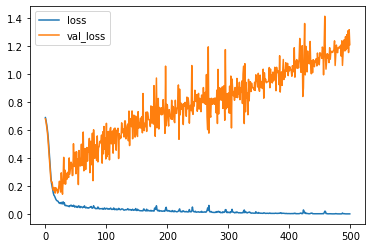

In [80]:
loss_model = pd.DataFrame(model.history.history)
loss_model.plot()

In [81]:
## model 2
model2 = Sequential()

model2.add(Dense(units = 30, activation = "relu"))
model2.add(Dense(units = 15, activation = "relu"))
model2.add(Dense(units = 15, activation = "relu"))
model2.add(Dense(units = 10, activation = "relu"))

model2.add(Dense(units = 1, activation = "sigmoid"))

model2.compile(loss = "binary_crossentropy", optimizer = "adam")

In [82]:
early_stopping = EarlyStopping(monitor = "val_loss", mode = "min", verbose = 1, patience = 25)

In [83]:
model2.fit(x = x_train, y = y_train, epochs = 500, validation_data = (x_test, y_true), verbose = 1, callbacks = [early_stopping])

Epoch 1/500
13/13 [==============================] - 1s 12ms/step - loss: 0.6865 - val_loss: 0.6798
Epoch 2/500
13/13 [==============================] - 0s 3ms/step - loss: 0.6657 - val_loss: 0.6627
Epoch 3/500
13/13 [==============================] - 0s 3ms/step - loss: 0.6431 - val_loss: 0.6399
Epoch 4/500
13/13 [==============================] - 0s 3ms/step - loss: 0.6090 - val_loss: 0.6023
Epoch 5/500
13/13 [==============================] - 0s 3ms/step - loss: 0.5631 - val_loss: 0.5511
Epoch 6/500
13/13 [==============================] - 0s 3ms/step - loss: 0.4958 - val_loss: 0.4741
Epoch 7/500
13/13 [==============================] - 0s 3ms/step - loss: 0.4061 - val_loss: 0.3799
Epoch 8/500
13/13 [==============================] - 0s 3ms/step - loss: 0.3222 - val_loss: 0.2863
Epoch 9/500
13/13 [==============================] - 0s 3ms/step - loss: 0.2662 - val_loss: 0.2860
Epoch 10/500
13/13 [==============================] - 0s 3ms/step - loss: 0.2227 - val_loss: 0.2040
Epoch 11

<AxesSubplot:>

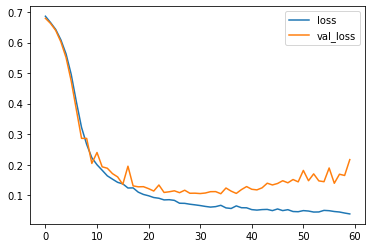

In [84]:
loss_model2 = pd.DataFrame(model2.history.history)
loss_model2.plot()

In [85]:
y_pred = (model2.predict(x_test) > 0.5).astype("int32")
y_pred

6/6 [==============================] - 0s 797us/step


array([[0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
    

In [86]:
cnf = confusion_matrix(y_true, y_pred)
cnf

array([[92, 11],
       [ 2, 66]], dtype=int64)

In [87]:
acc = accuracy_score(y_true, y_pred)
acc * 100

92.39766081871345